In [1]:
import pandas as pd
import numpy as np

In [16]:
nodes_as_mapping = pd.read_csv('midar-iff.nodes.as.txt', sep = '\t', header=None)
nodes_as_mapping.columns=['node_AS', 'node_id','AS','heuristic_tag']
nodes_as_mapping['node_id'] = nodes_as_mapping['node_id'].apply(lambda x : int(x[1:]))
nodes_as_mapping = nodes_as_mapping.drop(columns=['node_AS'])
nodes_as_mapping = nodes_as_mapping.set_index(['node_id'])
node_as_dict = nodes_as_mapping['AS'].transpose().to_dict()

In [4]:
# links = pd.read_csv('midar-iff_1.links.txt', sep=',', comment='#', names = ['route'], engine = 'c', lineterminator='l')

# links['route'].apply(lambda x : x[5:x.find(':')])

# links['link_no'] = links['route'].apply(lambda x : x[5:x.find(':')])
# links['route'] = links['route'].apply(lambda x : x[x.find(':')+2:])

# links['route'] = links['route'].apply(lambda x : x.strip().replace('\n',' '))

# links['route'].to_csv('routes.csv', index = False)

In [51]:
def convertToInt(input:str):
    if input is None or not isinstance(input, str):
        return None
    if input.find(':') != -1:
        return int(input[1:input.find(':')])
    return int(input[1:])

In [103]:
routes_df = pd.Series()
routes_df_as = pd.Series()

In [110]:
batch_size = 100000
this_size = batch_size
iteration = 0
while this_size == batch_size:
    new_batch = pd.read_csv('routes.csv', nrows = batch_size, skiprows = len(routes_df), header = None)
    
    new_batch = new_batch[0].str.split(' ')
    new_batch = new_batch.apply(lambda x:[convertToInt(node) for node in x])
    new_batch_as = new_batch.apply(lambda x: [node_as_dict.get(node) for node in x])
    
    this_size = len(new_batch)
    routes_df = pd.concat([routes_df, new_batch])
    routes_df_as = pd.concat([routes_df_as, new_batch_as])
    iteration = iteration + 1
    if iteration%10 == 0:
        print(len(routes_df))

70400000
71400000
72400000
73400000
74400000
75400000
76400000
77400000
78400000
79400000
80400000
81400000
82400000
83400000
84400000


In [109]:
len(routes_df)

69400000

In [106]:
routes_df.to_csv('routes_df.csv')

In [107]:
routes_df_as.to_csv('routes_df_as.csv')

In [97]:
len(routes)

416972

In [106]:
len(links['route'])

84524650

In [98]:
routes = routes.apply(lambda link : [AS for AS in link if AS is not None])

In [99]:
import networkx as nx

In [100]:
G = nx.Graph()

In [101]:
routes[0]

[12400, 11061]

In [102]:
routes.apply(lambda link: G.update(nx.complete_graph(link)))

0         None
1         None
2         None
3         None
4         None
          ... 
416967    None
416968    None
416969    None
416970    None
416971    None
Length: 416972, dtype: object

In [117]:
deg_count = {}

In [118]:
for node in G.nodes():
    deg_count[nx.degree(G, node)] = deg_count.get(nx.degree(G, node), 0)+1

In [127]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

<Axes: xlabel='index', ylabel='0'>

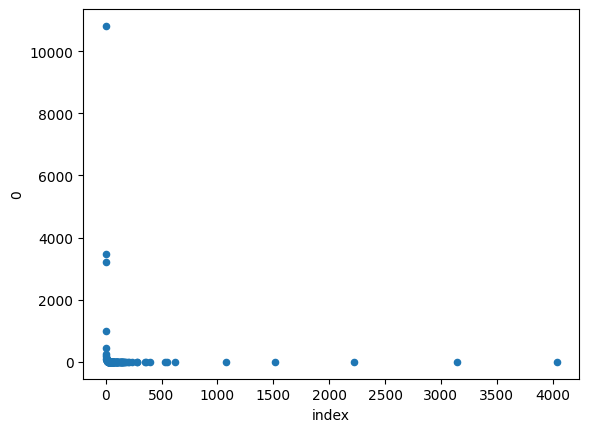

In [134]:
pd.Series(deg_count).sort_index().reset_index().plot(kind='scatter', x='index', y=0)

In [ ]:
route